# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []
dates = []
coordinates =[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # Grab the country code with the city name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        # Add the country code to a list
        countries.append(country)
        # Add coordinates to a list that corresponds with the cities
        coordinates.append(lat_lng)
        
# Print the city count to confirm sufficient count
print(len(cities))

605


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [17]:
# Create count of cities to increment as we loop through longitude and latitude
city_count = 0
city_weather_count = 0

# Create new data frame for weather api data
cities_weather = pd.DataFrame()

# Loop through coordinates
for coordinate in coordinates:
    print("Currently checking the weather for " + cities[city_count] + ", " + countries[city_count].upper())

    # Grab the longitude and latitude
#     current_lat = coordinate[0]
#     current_long = coordinate[1]  

    # Change coordinates to actual coordinates of the city
    city_search_url = "http://api.openweathermap.org/geo/1.0/direct?"
    search_param = cities[city_count].capitalize() + "," + countries[city_count].upper()
    params = {
        "q" : search_param,
        "appid": weather_api_key
    }
    city_search = requests.get(city_search_url, params=params)
    city_data = city_search.json()
    
#     print(city_data)
    
    if (city_data != []): 
        # Grab the longitude and latitude
        current_lat = city_data[0]['lat']
        current_long = city_data[0]['lon']

        # Create the api request
        base_url = "https://api.openweathermap.org/data/2.5/weather?"
        params = {
            "lat" : current_lat,
            "lon" : current_long,
            "appid" : weather_api_key,
            "units" : "imperial"
        }
        city_weather = requests.get(base_url, params=params)

        weather_data = city_weather.json()

        # Add the weather data and city data to the city_weather dataframe
        cities_weather.loc[city_weather_count, "City"] = cities[city_count].capitalize()
        cities_weather.loc[city_weather_count, "Lat"] = current_lat
        cities_weather.loc[city_weather_count, "Lng"] = current_long      
        cities_weather.loc[city_weather_count, "Max Temp"] = weather_data["main"]["temp_max"]
        cities_weather.loc[city_weather_count, "Humidity"] = weather_data["main"]["humidity"]
        cities_weather.loc[city_weather_count, "Cloudliness"] = weather_data["clouds"]["all"]
        cities_weather.loc[city_weather_count, "Wind Speed"] = weather_data["wind"]["speed"]
        cities_weather.loc[city_weather_count, "Country"] = countries[city_count].upper()
        current_date = weather_data["dt"] + weather_data["timezone"]
        cities_weather.loc[city_weather_count, "Date"] = current_date

        # Increment the city count
        city_count = city_count + 1
        city_weather_count = city_count + 1

    else:
        city_count = city_count + 1
        continue

# Display the final table of city and weather data
display(cities_weather)

Currently checking the weather for strezhevoy, RU
Currently checking the weather for port alfred, ZA
Currently checking the weather for tura, RU
Currently checking the weather for hilo, US
Currently checking the weather for itaituba, BR
Currently checking the weather for ushuaia, AR
Currently checking the weather for avera, PF
Currently checking the weather for punta arenas, CL
Currently checking the weather for do gonbadan, IR
Currently checking the weather for waipawa, NZ
Currently checking the weather for leh, IN
Currently checking the weather for bedford, US
Currently checking the weather for tarrafal, CV
Currently checking the weather for catemaco, MX
Currently checking the weather for busselton, AU
Currently checking the weather for vila franca do campo, PT
Currently checking the weather for albany, AU
Currently checking the weather for barentsburg, SJ
Currently checking the weather for ogulin, HR
Currently checking the weather for adeje, ES
Currently checking the weather for dan

Currently checking the weather for eenhana, NA
Currently checking the weather for east london, ZA
Currently checking the weather for puerto ayora, EC
Currently checking the weather for mahebourg, MU
Currently checking the weather for oktyabrskoye, RU
Currently checking the weather for lebu, CL
Currently checking the weather for staunton, US
Currently checking the weather for beruwala, LK
Currently checking the weather for vila do maio, CV
Currently checking the weather for manaure, CO
Currently checking the weather for sandila, IN
Currently checking the weather for kalmunai, LK
Currently checking the weather for novyy urgal, RU
Currently checking the weather for amarante do maranhao, BR
Currently checking the weather for chokurdakh, RU
Currently checking the weather for cabo san lucas, MX
Currently checking the weather for hamilton, BM
Currently checking the weather for santa isabel do rio negro, BR
Currently checking the weather for urumqi, CN
Currently checking the weather for inhamb

Currently checking the weather for acapulco, MX
Currently checking the weather for vallenar, CL
Currently checking the weather for kuytun, CN
Currently checking the weather for yumen, CN
Currently checking the weather for subaytilah, TN
Currently checking the weather for acari, PE
Currently checking the weather for hammerfest, NO
Currently checking the weather for phrai bung, TH
Currently checking the weather for la palma, PA
Currently checking the weather for kawalu, ID
Currently checking the weather for igrim, RU
Currently checking the weather for rena, NO
Currently checking the weather for mabaruma, GY
Currently checking the weather for galiwinku, AU
Currently checking the weather for kodinar, IN
Currently checking the weather for bolshoy tsaryn, RU
Currently checking the weather for yelizovo, RU
Currently checking the weather for oeiras, BR
Currently checking the weather for kulykiv, UA
Currently checking the weather for zhanatas, KZ
Currently checking the weather for tarko-sale, R

Currently checking the weather for muisne, EC
Currently checking the weather for beyneu, KZ
Currently checking the weather for ukiah, US
Currently checking the weather for muzhi, RU
Currently checking the weather for colesberg, ZA
Currently checking the weather for antofagasta, CL
Currently checking the weather for esil, KZ
Currently checking the weather for odate, JP
Currently checking the weather for trofors, NO
Currently checking the weather for biak, ID
Currently checking the weather for gombong, ID
Currently checking the weather for bosaso, SO
Currently checking the weather for okha, RU
Currently checking the weather for bargal, SO
Currently checking the weather for kapoeta, SD
Currently checking the weather for kodinsk, RU
Currently checking the weather for rawson, AR
Currently checking the weather for alta floresta, BR
Currently checking the weather for diglur, IN
Currently checking the weather for karia, GR
Currently checking the weather for jodhpur, IN
Currently checking the w

,City,Lat,Lng,Max Temp,Humidity,Cloudliness,Wind Speed,Country,Date
0,Strezhevoy,60.732758,77.600807,25.59,77.0,0.0,1.99,RU,1.651379e+09
2,Port alfred,-33.598184,26.891477,56.05,83.0,1.0,1.99,ZA,1.651361e+09
3,Tura,64.274196,100.216964,23.56,75.0,97.0,4.18,RU,1.651379e+09
4,Hilo,19.707373,-155.081580,78.19,80.0,100.0,5.75,US,1.651318e+09
5,Itaituba,-4.262522,-55.987814,87.85,66.0,40.0,3.44,BR,1.651343e+09
...,...,...,...,...,...,...,...,...,...
600,Zaltan,32.946146,11.866804,64.17,78.0,3.0,24.92,LY,1.651362e+09
602,Tucuman,-26.830370,-65.203813,60.84,77.0,100.0,8.05,AR,1.651344e+09
603,Trapani,38.017432,12.515992,61.92,82.0,0.0,3.44,IT,1.651362e+09
604,Quelimane,-17.877510,36.890216,73.35,88.0,0.0,2.30,MZ,1.651362e+09


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
# Export DataFrame to CSV file
import os
os.makedirs('Export', exist_ok=True)
cities_weather.to_csv('Export/City_Weather.csv')

In [19]:
#Describe the table of weather data 
cities_weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudliness,Wind Speed,Date
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,5.570000e+02
mean,18.434902,23.311069,61.142370,71.459605,57.574506,7.855224,1.651363e+09
std,33.502410,89.367352,19.794741,20.990334,38.893328,5.237407,2.055268e+04
min,-54.806116,-179.413096,1.630000,1.000000,0.000000,0.000000,1.651315e+09
25%,-9.869322,-57.548270,48.000000,64.000000,20.000000,3.710000,1.651344e+09
50%,20.518194,30.474108,63.190000,77.000000,70.000000,6.910000,1.651365e+09
75%,47.575924,97.750000,78.220000,86.000000,99.000000,10.760000,1.651380e+09
max,77.468636,177.506092,94.960000,100.000000,100.000000,28.500000,1.651401e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
# Select cities with humidity less than or equal to 100
cities_weather = cities_weather[cities_weather["Humidity"] <= 100]

In [21]:
#  Get the indices of cities that have humidity over 100%.


In [22]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

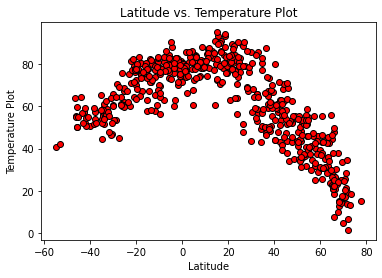

In [23]:
# Select specified data
latitudes = cities_weather["Lat"]
temperature_plot = cities_weather["Max Temp"]

#Create plot
plt.scatter(latitudes, temperature_plot, marker="o", facecolors="red", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature Plot")

plt.show()

## Latitude vs. Humidity Plot

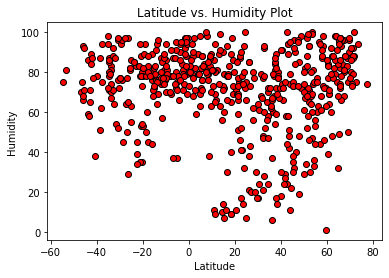

In [24]:
# Select specified data
latitudes = cities_weather["Lat"]
humidity = cities_weather["Humidity"]

#Create plot
plt.scatter(latitudes, humidity, marker="o", facecolors="red", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.show()

## Latitude vs. Cloudiness Plot

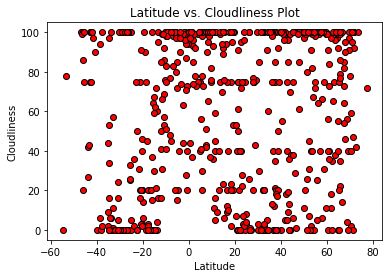

In [25]:
# Select specified data
latitudes = cities_weather["Lat"]
cloudliness = cities_weather["Cloudliness"]

#Create plot
plt.scatter(latitudes, cloudliness, marker="o", facecolors="red", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Latitude vs. Cloudliness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudliness")

plt.show()

## Latitude vs. Wind Speed Plot

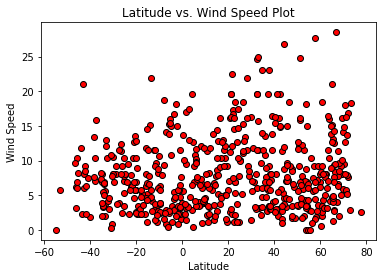

In [26]:
# Select specified data
latitudes = cities_weather["Lat"]
wind_speed = cities_weather["Wind Speed"]

#Create plot
plt.scatter(latitudes, wind_speed, marker="o", facecolors="red", edgecolors="black")

# Create a title, x label, and y label for our chart
plt.title("Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.show()

## Linear Regression

In [27]:
# Import scipy for linear regression calculations
import scipy.stats as st
from scipy import stats


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.6054661986056258


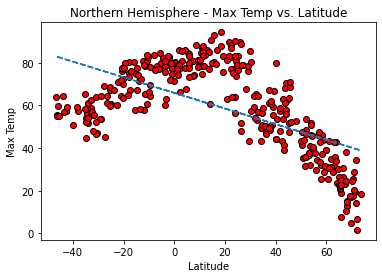

In [28]:
# Select specified data from cities in the Northern Hemisphere
nh_cities = cities_weather[cities_weather["Lng"] >= 0]
latitudes = nh_cities["Lat"]
temperature_plot = nh_cities["Max Temp"]

#Calculate linear regression
cities_slope, cities_int, cities_r, cities_p, cities_std_err = stats.linregress(latitudes, temperature_plot)
cities_fit = cities_slope * latitudes + cities_int

#Plot the data
plt.scatter(latitudes, temperature_plot, marker="o", facecolors="red", edgecolors="black")
plt.plot(latitudes,cities_fit,"--")

# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Display the r value
print("The r-value is " + str(cities_r))

plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.49438589668707866


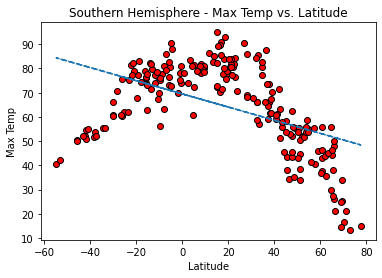

In [29]:
# Select specified data from cities in the Southern Hemisphere
sh_cities = cities_weather[cities_weather["Lng"] <= 0]
latitudes = sh_cities["Lat"]
temperature_plot = sh_cities["Max Temp"]

#Calculate linear regression
cities_slope, cities_int, cities_r, cities_p, cities_std_err = stats.linregress(latitudes, temperature_plot)
cities_fit = cities_slope * latitudes + cities_int

#Plot the data
plt.scatter(latitudes, temperature_plot, marker="o", facecolors="red", edgecolors="black")
plt.plot(latitudes,cities_fit,"--")

# Create a title, x label, and y label for our chart
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Display the r value
print("The r-value is " + str(cities_r))

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is -0.06267199414655814


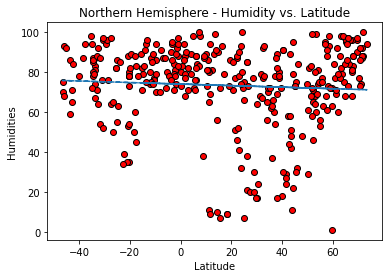

In [30]:
# Select specified data
latitudes = nh_cities["Lat"]
humidities = nh_cities["Humidity"]

#Calculate linear regression
cities_slope, cities_int, cities_r, cities_p, cities_std_err = stats.linregress(latitudes, humidities)
cities_fit = cities_slope * latitudes + cities_int

#Plot the data
plt.scatter(latitudes, humidities, marker="o", facecolors="red", edgecolors="black")
plt.plot(latitudes,cities_fit,"--")

# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidities")

# Display the r value
print("The r-value is " + str(cities_r))

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is -0.09585234303357199


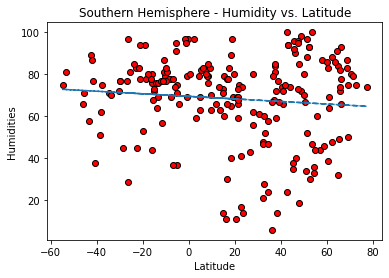

In [31]:
# Select specified data
latitudes = sh_cities["Lat"]
humidities = sh_cities["Humidity"]

#Calculate linear regression
cities_slope, cities_int, cities_r, cities_p, cities_std_err = stats.linregress(latitudes, humidities)
cities_fit = cities_slope * latitudes + cities_int

#Plot the data
plt.scatter(latitudes, humidities, marker="o", facecolors="red", edgecolors="black")
plt.plot(latitudes,cities_fit,"--")

# Create a title, x label, and y label for our chart
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidities")

# Display the r value
print("The r-value is " + str(cities_r))

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.21476496292509026


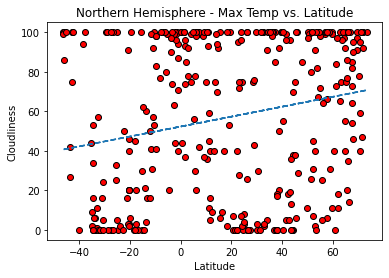

In [32]:
# Select specified data
latitudes = nh_cities["Lat"]
cloudliness = nh_cities["Cloudliness"]

#Calculate linear regression
cities_slope, cities_int, cities_r, cities_p, cities_std_err = stats.linregress(latitudes, cloudliness)
cities_fit = cities_slope * latitudes + cities_int

#Plot the data
plt.scatter(latitudes, cloudliness, marker="o", facecolors="red", edgecolors="black")
plt.plot(latitudes,cities_fit,"--")

# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudliness")

# Display the r value
print("The r-value is " + str(cities_r))

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.04024598577021539


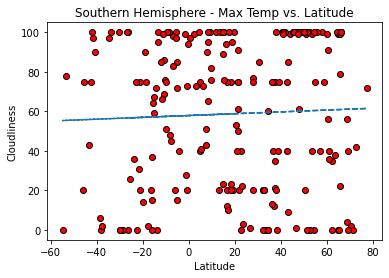

In [33]:
# Select specified data
latitudes = sh_cities["Lat"]
cloudliness = sh_cities["Cloudliness"]

#Calculate linear regression
cities_slope, cities_int, cities_r, cities_p, cities_std_err = stats.linregress(latitudes, cloudliness)
cities_fit = cities_slope * latitudes + cities_int

#Plot the data
plt.scatter(latitudes, cloudliness, marker="o", facecolors="red", edgecolors="black")
plt.plot(latitudes,cities_fit,"--")

# Create a title, x label, and y label for our chart
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudliness")

# Display the r value
print("The r-value is " + str(cities_r))

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.12095654790120641


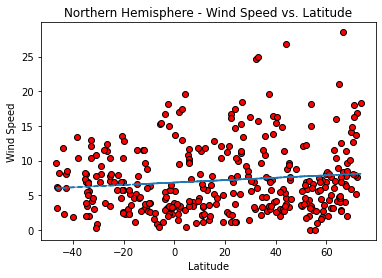

In [34]:
# Select specified data
latitudes = nh_cities["Lat"]
wind_speed = nh_cities["Wind Speed"]

#Calculate linear regression
cities_slope, cities_int, cities_r, cities_p, cities_std_err = stats.linregress(latitudes, wind_speed)
cities_fit = cities_slope * latitudes + cities_int

#Plot the data
plt.scatter(latitudes, wind_speed, marker="o", facecolors="red", edgecolors="black")
plt.plot(latitudes,cities_fit,"--")

# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Display the r value
print("The r-value is " + str(cities_r))

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.1520259945765427


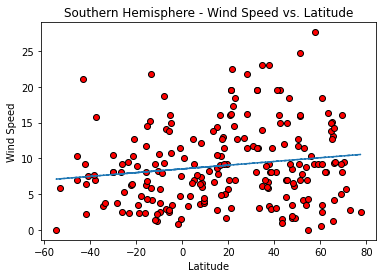

In [35]:
# Select specified data
latitudes = sh_cities["Lat"]
wind_speed = sh_cities["Wind Speed"]

#Calculate linear regression
cities_slope, cities_int, cities_r, cities_p, cities_std_err = stats.linregress(latitudes, wind_speed)
cities_fit = cities_slope * latitudes + cities_int

#Plot the data
plt.scatter(latitudes, wind_speed, marker="o", facecolors="red", edgecolors="black")
plt.plot(latitudes,cities_fit,"--")

# Create a title, x label, and y label for our chart
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Display the r value
print("The r-value is " + str(cities_r))

plt.show()